In [1]:

import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score


In [43]:
import pandas as pd
df=pd.read_csv(r"C:\Users\raman\Downloads\input.csv")

In [72]:
k=[]
m=[]

In [73]:
for i in range(df.shape[0]):
    if df.iloc[i,2]=="Training":
        l=[]
        l.append((df.iloc[i,1]).split(" "))
        for j in range(len(l[0])):
            k.append(int(l[0][j]))
    else:
        l=[]
        l.append((df.iloc[i,1]).split(" "))
        for j in range(len(l[0])):
            m.append(int(l[0][j]))  


In [61]:
for i in range(df.shape[0]):
        l=[]
        l.append((df.iloc[i,1]).split(" "))
        for j in range(len(l[0])):
            k.append(int(l[0][j]))
    

In [69]:
l=[]
l.append((df.iloc[0,1]).split(" "))
for j in range(len(l[0])):
    k.append(int(l[0][j]))
            

In [70]:
len(k)

2304

In [74]:
m=np.array(m)
k=np.array(k)

In [75]:
k=k.reshape(28709,48,48)
m=m.reshape(7178,48,48)

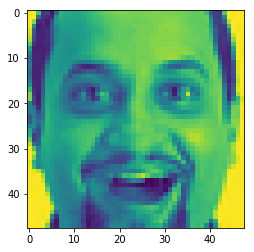

In [76]:
plt.imshow(k[354])

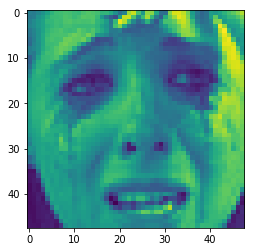

In [78]:
data_train = [ color.rgb2gray(i) for i in k]
data_test=[ color.rgb2gray(i) for i in m]
plt.imshow(k[54])

### Using HOG Extraction algorithm, generating feature sets

In [79]:
ppc = 16
hog_images_train = []
hog_features_train = []
for image in data_train:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(1, 1),block_norm= 'L2',visualise=True)
    hog_images_train.append(hog_image)
    hog_features_train.append(fd)

C:\Users\raman\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [80]:
ppc = 16
hog_images_test = []
hog_features_test = []
for image in data_test:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(1, 1),block_norm= 'L2',visualise=True)
    hog_images_test.append(hog_image)
    hog_features_test.append(fd)

C:\Users\raman\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


72


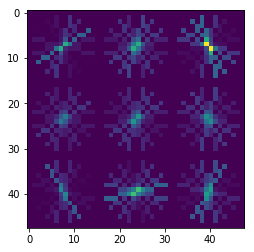

In [81]:
plt.imshow(hog_images_train[54])
print(len(hog_features_train[54]))

In [83]:
labels_train =  np.array(df['emotion (label)'][df.Usage=="Training"]).reshape(28709,1)
labels_test=np.array(df['emotion (label)'][(df.Usage=="PrivateTest") | (df.Usage=="PublicTest")]).reshape(7178,1)

In [128]:
clf = svm.SVC(kernel="linear")

In [84]:

hog_features_train = np.array(hog_features_train)
df_train = np.hstack((hog_features_train,labels_train))
np.random.shuffle(df_train)

In [85]:
hog_features_test = np.array(hog_features_test)
df_test = np.hstack((hog_features_test,labels_test))
np.random.shuffle(df_test)

In [132]:
x_train, x_test = df_train[:,:-1],df_test[:,:-1]
y_train, y_test = df_train[:,-1].ravel() , df_test[:,-1].ravel()



In [120]:
from imblearn.over_sampling import SMOTE # for imbalance classes
os = SMOTE(random_state=0)

C:\Users\raman\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [121]:
os_data_X,os_data_y=os.fit_sample(x_train,y_train)

In [129]:
clf.fit(os_data_X,os_data_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
y_pred = clf.predict(x_test)

In [131]:
print("Accuracy: ",(accuracy_score(y_pred, y_test)))
print('\n')
print(classification_report(y_pred, y_test))

Accuracy:  0.6733073279465032


              precision    recall  f1-score   support

         0.0       0.67      0.87      0.75      4133
         1.0       0.70      0.41      0.51      3045

    accuracy                           0.67      7178
   macro avg       0.68      0.64      0.63      7178
weighted avg       0.68      0.67      0.65      7178



In [140]:
pd.DataFrame(df_train).to_csv("hog features_train.csv")

In [141]:
pd.DataFrame(df_test).to_csv("hog features_test.csv")

In [142]:
pd.DataFrame(y_pred).to_csv("predicted labels.csv")